In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

Text(0, 0.5, 'Watt')

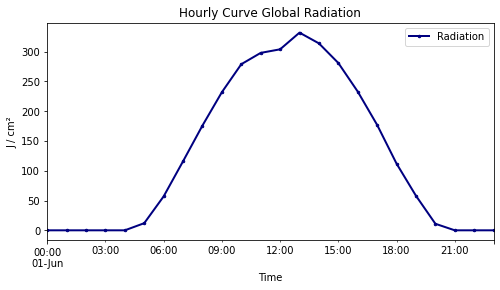

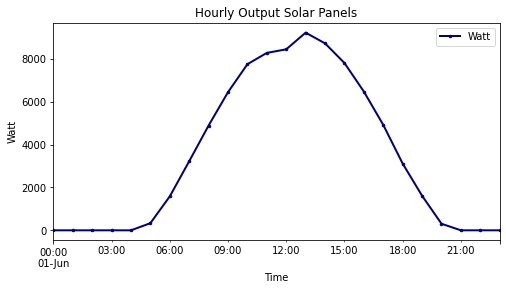

In [44]:
f=open('data/produkt_st_stunde_19570101_20210831_05705.txt',"r")
rows=f.readlines()
result={}

for row in rows:
    key = row.split(';')[8]
    value = row.split(';')[5]

    if key.startswith('20200601'):
        datetime_key = datetime.strptime(key, '%Y%m%d%H:%M')
        result[datetime_key] = value
f.close()

df = pd.DataFrame.from_dict(result, orient='index', columns=['Radiation'])
df['Radiation'] =  pd.to_numeric(df['Radiation'])

ax = df.plot(lw=2, colormap='jet', marker='.', markersize=5, title='Hourly Curve Global Radiation', figsize=(8, 4))
ax.set_xlabel("Time")
ax.set_ylabel("J / cm²")

watt = df 
# / 1000 to convert from J/cm² to kJ/cm² then * 2.78 to convert to kWh/m², then / 1000 to convert to Wh/m² and * 10 kWpeak
watt['Watt'] =  watt['Radiation'] / 1000 * 2.78 * 1000 * 10
del watt['Radiation']
ax = watt.plot(lw=2, colormap='jet', marker='.', markersize=5, title='Hourly Output Solar Panels', figsize=(8, 4))
ax.set_xlabel("Time")
ax.set_ylabel("Watt")

